In [1]:
import serial
from datetime import datetime
import pandas as pd
import serial.tools.list_ports
from matplotlib import pyplot as plt
from IPython.display import clear_output

In [3]:
# Get the list of available serial ports
ports = serial.tools.list_ports.comports()

# Iterate through the ports and print their details
for port in ports:
    print(port.device)

port = '/dev/ttyACM0'
baud_rate = 9600
N_UV = 4
MAGNETOMETER_SAMPLES = 10

/dev/ttyACM0


In [13]:
# store frames in case of further analysis
frames = []

# Open the serial port
ser = serial.Serial(port, baud_rate)


# Read and print the serial output
while True:
    dataline = ser.readline().decode('utf-8').strip()  # Convert bytes to string
    frames.append(pd.DataFrame([dataline.split(',')]))
    frames[-1].to_csv("IMU_B_test.csv", mode='a', index = False, header = False)


KeyboardInterrupt: 

In [5]:
for i in range(1,4):
    df = pd.read_csv(f"IMU_B_test_dancing{i}.csv", names=['x', 'y', 'z'])
    print(f"{i}:")
    for direction in ['x', 'y', 'z']:
        print(f"Values in {direction} direction vary from {df[direction].min()} to {df[direction].max()}, max-min: {df[direction].max() - df[direction].min()}, offset is: {(df[direction].max() + df[direction].min()) / 2}")

1:
Values in x direction vary from -68.971917 to 17.542857, max-min: 86.514774, offset is: -25.714530000000003
Values in y direction vary from 6.147497 to 84.715507, max-min: 78.56801, offset is: 45.431502
Values in z direction vary from -404.835165 to -305.725519, max-min: 99.109646, offset is: -355.280342
2:
Values in x direction vary from -34.186081 to 57.726496, max-min: 91.912577, offset is: 11.770207499999998
Values in y direction vary from 7.496947 to 89.813431, max-min: 82.31648399999999, offset is: 48.655189
Values in z direction vary from -391.340659 to -301.977045, max-min: 89.36361400000004, offset is: -346.658852
3:
Values in x direction vary from -34.635897 to 61.624908, max-min: 96.260805, offset is: 13.494505499999999
Values in y direction vary from 17.992674 to 81.716728, max-min: 63.724054, offset is: 49.854701000000006
Values in z direction vary from -390.890842 to -301.077411, max-min: 89.81343100000004, offset is: -345.9841265


In [14]:
for i in range(3):
    df = pd.read_csv(f"IMU_B_test{i}.csv", names=['x', 'y', 'z'])
    print(f"{i}:")
    for direction in ['x', 'y', 'z']:
        print(f"Values in {direction} direction vary from {df[direction].min()} to {df[direction].max()}, max-min: {df[direction].max() - df[direction].min()}, offset is: {(df[direction].max() + df[direction].min()) / 2}")

0:
Values in x direction vary from -86.514774 to 6.147497, max-min: 92.662271, offset is: -40.1836385
Values in y direction vary from -37.034921 to 50.829304, max-min: 87.864225, offset is: 6.897191500000002
Values in z direction vary from -424.926984 to -328.516239, max-min: 96.41074500000002, offset is: -376.7216115
1:
Values in x direction vary from -82.616361 to 4.34823, max-min: 86.964591, offset is: -39.1340655
Values in y direction vary from -34.785836 to 50.079609, max-min: 84.865445, offset is: 7.646886499999997
Values in z direction vary from -421.778266 to -331.365079, max-min: 90.413187, offset is: -376.5716725
2:
Values in x direction vary from -85.165324 to 2.698901, max-min: 87.864225, offset is: -41.233211499999996
Values in y direction vary from -35.085714 to 49.92967, max-min: 85.01538400000001, offset is: 7.421977999999999
Values in z direction vary from -421.778266 to -332.564591, max-min: 89.21367499999997, offset is: -377.1714285


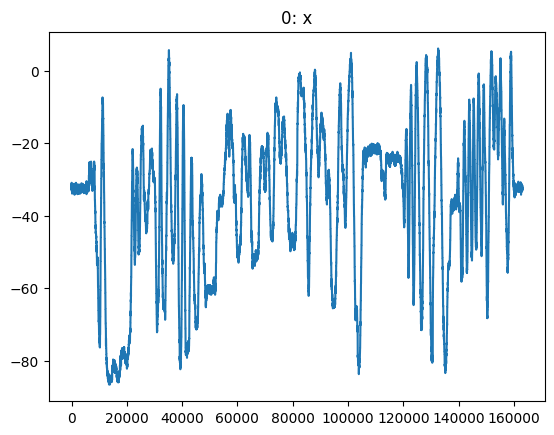

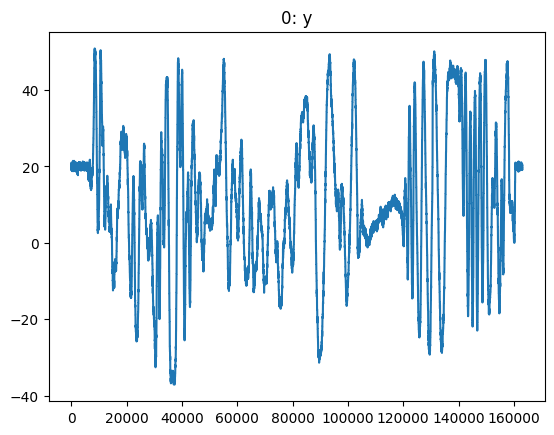

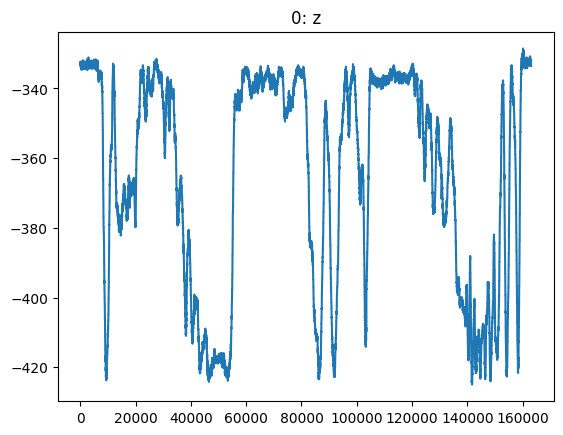

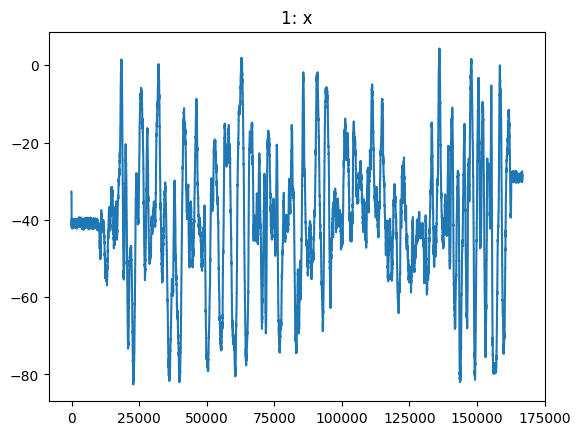

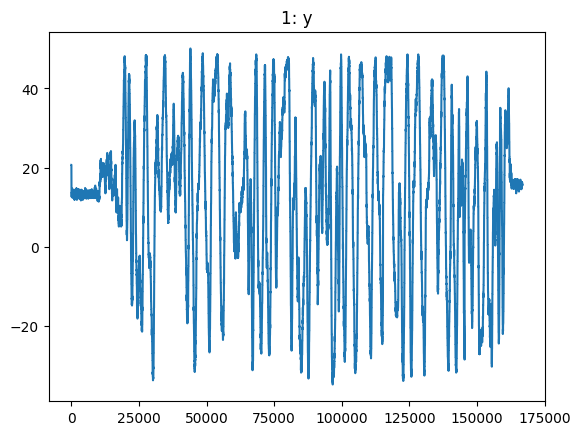

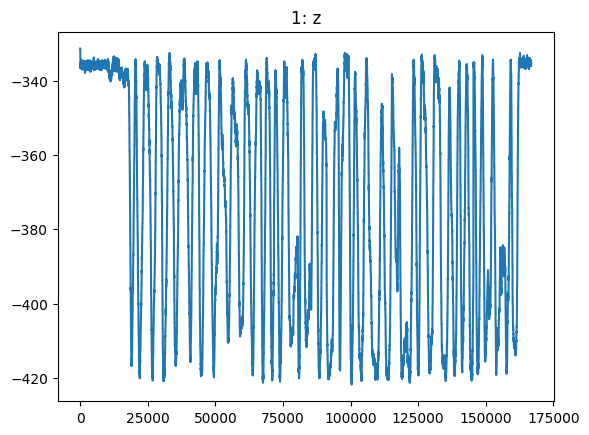

In [12]:
for i in range(2):
    df = pd.read_csv(f"IMU_B_test{i}.csv", names=['x', 'y', 'z'])
    for d in ['x', 'y', 'z']:
        plt.plot(df[d])
        plt.title(f'{i}: {d}')
        plt.show()